In [ ]:
from IPython.display import clear_output

#@markdown # Install dependencies

!git clone https://github.com/Sygil-Dev/nataili.git
!sudo apt-get update -y
!sudo apt-get install python3.8

#change alternatives
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 2

#check python version
!python --version

# Install pip
!sudo apt install python3-pip
!python -m pip install --upgrade pip

%cd /content/nataili

!pip install -e .

!pip install ray

# See: https://github.com/CompVis/taming-transformers/issues/176
# do not uncomment -e git+https://github.com/CompVis/taming-transformers.git@master#egg=taming-transformers
!pip install invisible-watermark==0.1.5
!pip install taming-transformers-rom1504==0.0.6  # required by ldm

!pip install git+https://github.com/crowsonkb/k-diffusion.git

# Dependencies required for Stable Diffusion UI
!pip install pynvml==11.4.1
!pip install omegaconf==2.2.3

# Note: Jinja2 3.x major version required due to breaking changes found in markupsafe==2.1.1; 2.0.1 is incompatible with other upstream dependencies
# see https://github.com/pallets/markupsafe/issues/304
!pip install Jinja2==3.1.2  # Jinja2 is required by Gradio

#!pip install diffusers==0.4.1
!pip install diffusers==0.6.0

# Img2text
!pip install fairscale==0.4.4
!pip install timm==0.6.7
!pip install tqdm==4.64.0

# Other
!pip install retry==0.9.2  # used by sd_utils
!pip install python-slugify==6.1.2  # used by sd_utils
!pip install piexif==1.1.3  # used by sd_utils

!pip install accelerate==0.12.0
!pip install albumentations==0.4.3
!pip install einops==0.3.1
!pip install facexlib>=0.2.3
!pip install imageio-ffmpeg==0.4.2
!pip install imageio==2.9.0
!pip install kornia==0.6
!pip install loguru
!pip install opencv-python-headless==4.6.0.66
!pip install open-clip-torch==2.0.2
!pip install pandas==1.4.3
!pip install pudb==2019.2
!pip install pytorch-lightning==1.7.7
!pip install realesrgan==0.3.0
!pip install test-tube>=0.7.5
!pip install timm==0.6.7
!pip install torch-fidelity==0.3.0
#do not change transformers version
!pip install transformers==4.21.3 # do not change
#do not change transformers version
!pip install wget

# Upscalers
!pip install basicsr==1.4.2  # required by RealESRGAN
!pip install gfpgan==1.3.8  # GFPGAN
!pip install realesrgan==0.3.0  # RealESRGAN brings in GFPGAN as a requirement
!pip install git+https://github.com/CompVis/latent-diffusion

## for monocular depth estimation 
!pip install tensorflow==2.10.0

# Install xformers
!wget https://github.com/pamparamm/xfromers_builds_colab/releases/download/3372350813/xformers-0.0.14.dev0-cp38-cp38-linux_x86_64.whl
!pip install xformers-0.0.14.dev0-cp38-cp38-linux_x86_64.whl

clear_output()

Workers name is more for aesthetics and just helps you keep track of workers on the worker tab in the webui clients



---


The api key is generated when you [create an account](https://stablehorde.net/register). Alternatively leaving it blank helps support the public anonymous account (`0000000000`)

In [ ]:
#@markdown # Setup Info

horde_url = "https://stablehorde.net"
worker_name = "" #@param {"type":"string"}
if worker_name == "":
  worker_name = "Colab Instance, courtesy to Blanco"
api_key = "" #@param {"type":"string"}
if api_key == "":
  api_key = "0000000000"

priority_usernames = []
max_power = 8
max_threads = 1
nsfw = True
censor_nsfw = False
blacklist = []
censorlist = []
allow_img2img = True
allow_painting = True
allow_unsafe_ip = True

models_to_skip = [
    "stable_diffusion_inpainting",  
    "stable_diffusion_2.1",  
    "stable_diffusion_2.0", 
]

dynamic_models = False

number_of_dynamic_models = 5

models_to_load = [
    "Anything Diffusion",
    "Yiffy",
    "waifu_diffusion",
    "stable_diffusion"
]

In [ ]:
#@markdown # Model_Setup
if not "mount_google_drive" in locals():
  mount_google_drive = False

%cd /content/nataili

import requests, json

models = json.load(open("./db.json"))

try:
    r = requests.get("https://raw.githubusercontent.com/Sygil-Dev/nataili-model-reference/main/db.json")
    models = r.json()
except Exception:
    models = json.load(open("./db.json"))

filtered_models = {}
for model_name in models:
  if models[model_name].get("type") == "ckpt":
    filtered_models[model_name] = models[model_name]

ppmodels = ""
for model_name in filtered_models:
    if model_name == "LDSR":
        continue
    ppmodels += model_name
    if filtered_models[model_name].get("description"):
        ppmodels += f" : {filtered_models[model_name].get('description')}"
    ppmodels += "\n"

In order for your worker to work, it needs to download a stable diffusion model. To do that, you will need to register a free account at https://huggingface.co. You will need to put your username and password for it when prompted. You will also need to accept the license of the model you're about to download, so after logging in to huggingface, visit https://huggingface.co/runwayml/stable-diffusion-v1-5 and accept the license presented within. 


---


You will also be prompted in the next cell's output whether you want the script to download the models,this downloads models directly to the colab server hosted by google and does not present any security risks to you nor is it dependant on your wifi speed. Just enter `y`

Example Screenshot:
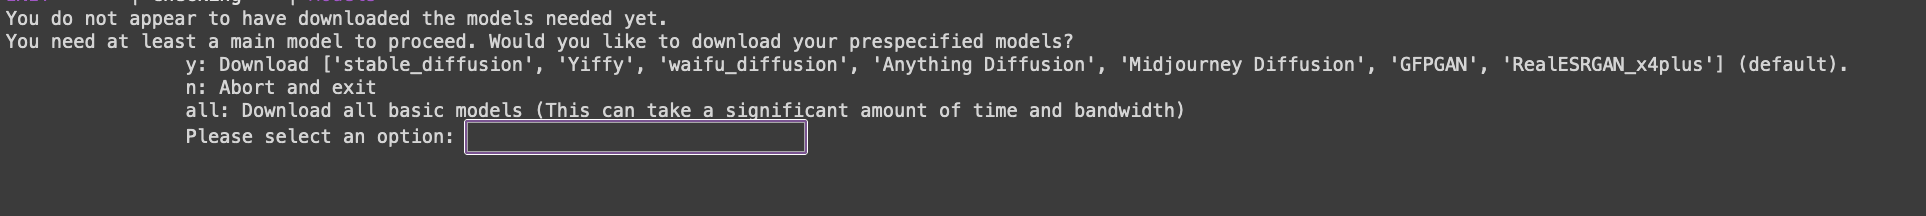

In [ ]:


#@markdown # Start Stable Horde worker
import os

huggingface_token = "" #@param {"type":"string"}

%cd /content/nataili/

if "api_key" in locals():
  data = f"""horde_url = "{horde_url}"
worker_name = "{worker_name}"
api_key = "{api_key}"
priority_usernames = {priority_usernames}
max_power = {max_power}
max_threads = {max_threads}
nsfw = {nsfw}
censor_nsfw = {censor_nsfw}
blacklist = {blacklist}
censorlist = {censorlist}
allow_img2img = {allow_img2img}
allow_painting = {allow_painting}
allow_unsafe_ip = {allow_unsafe_ip}
dynamic_models = {dynamic_models}
number_of_dynamic_models = {number_of_dynamic_models}
models_to_load = {models_to_load}
models_to_skip = {models_to_skip}"""
  toExec = """text_file = open("bridgeData.py", "w+"); text_file.write(data); text_file.close()""" 
  exec(toExec)

!python bridge.py --hf_token $huggingface_token